In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score


In [4]:
dataFrame = pd.read_csv('csv/customer_staying_or_not.csv')

In [5]:
dataFrame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataFrame.isnull().sum()
dataFrame.dropna(inplace=True)

In [7]:
pd.set_option('display.max_columns', None)
X = dataFrame.iloc[ : , 3:13]
y = dataFrame.iloc[ : , -1]



In [8]:
X = pd.get_dummies(X) 
columnNames = list(X.columns)
X = X.values
y = y.values


In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 42 )

In [11]:
model = Sequential()
model.add(Dense(6, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
266/266 [==============================] - 2s 2ms/step - loss: 0.5051 - accuracy: 0.7947
Epoch 2/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8012
Epoch 3/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8195
Epoch 4/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8244
Epoch 5/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8326
Epoch 6/100
266/266 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8431
Epoch 7/100
266/266 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8491
Epoch 8/100
266/266 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8522
Epoch 9/100
266/266 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.8538
Epoch 10/100
266/266 [==============================] - 1s 2ms/step - loss: 0.3551 - accura

<Axes: >

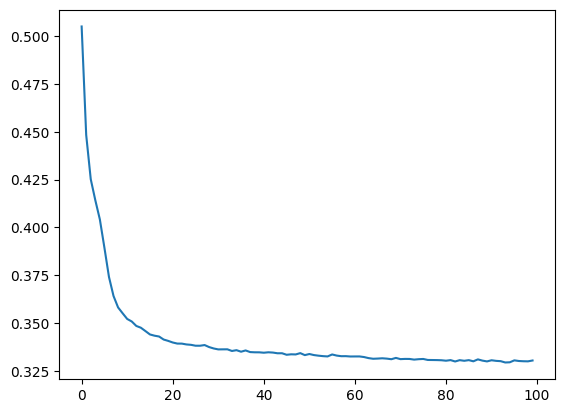

In [13]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)


In [14]:
model.evaluate(X_test,y_test,verbose=1) 


47/47 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8593


[0.34324267506599426, 0.859333336353302]

In [15]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)


47/47 [==============================] - 0s 1ms/step
[[1154   53]
 [ 158  135]]


In [16]:
print(columnNames)
new_value = [[600, 40, 3, 60000, 2, 1, 1, 50000, 1, 0, 0, 0, 1]]
new_value = scaler.transform(new_value)
model.predict(new_value)


['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']
1/1 [==============================] - 0s 27ms/step


array([[0.01826182]], dtype=float32)

In [17]:
model.save('customer_retention_prediction_model.h5')